# Bank Loan Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

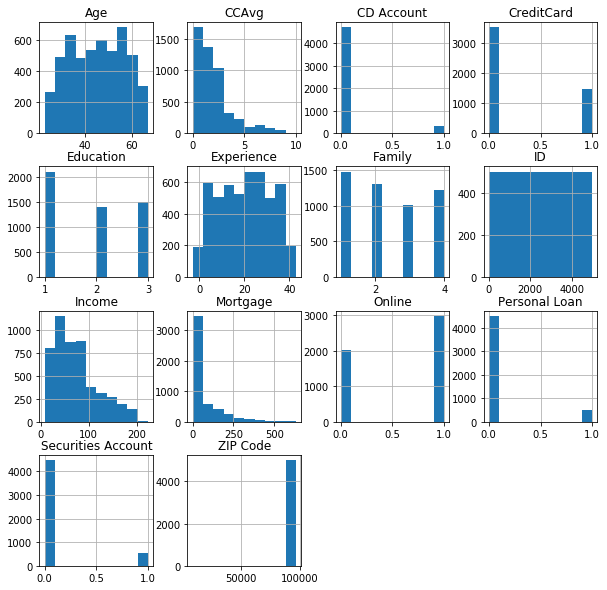

In [6]:
data.hist(figsize=(10,10))
plt.show()

# Inference

ID and Zip code are not useful for Analysis.

CD Account, Credit Card, Education, Family, Online, Securities Account are Categorical Variables.

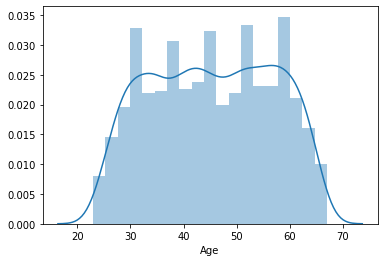

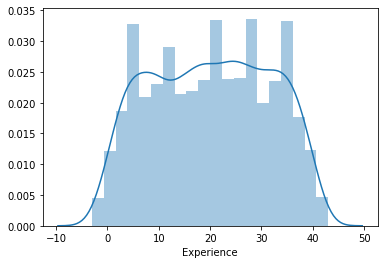

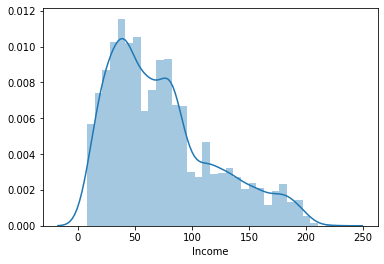

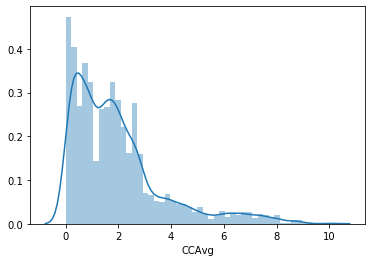

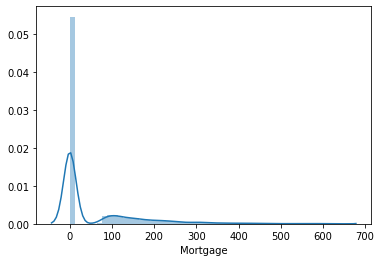

In [7]:
col_list=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in col_list:
    sb.distplot(data[col])
    plt.show()

# Inference

Mortgage is Bimodal.

Age, Experience, Income, CCAvg is Multimodal.

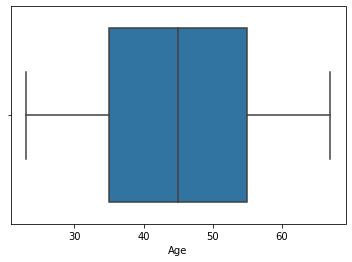

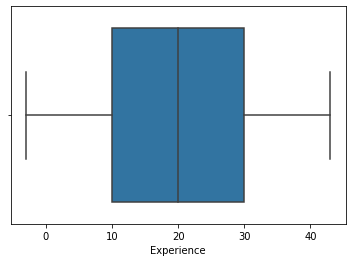

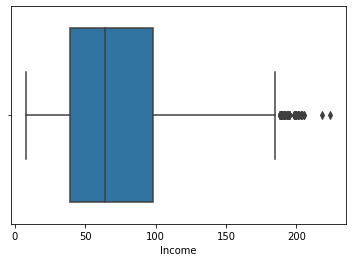

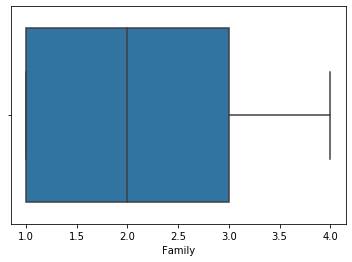

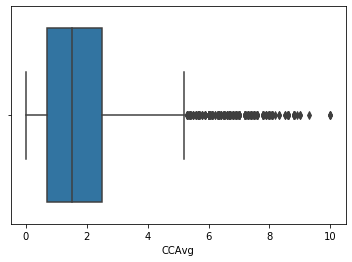

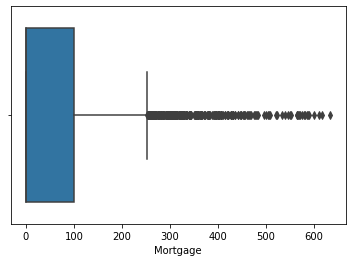

In [8]:
column_list = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for a in column_list:
    sb.boxplot(data[a])
    plt.show()

# Inference

No Outliers: Age, Experience, Family.

Outliers: Mortgage, CCAvg, Income.

# Decision Tree

In [9]:
from sklearn import tree
from sklearn import preprocessing

In [11]:
data = data.drop(['ID','ZIP Code'], axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [13]:
x_log = data.drop(['Personal Loan'], axis=1)
x_log.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [14]:
y_log = data.iloc[:, 7:8]
y_log.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [15]:
model = tree.DecisionTreeClassifier()
model.fit(x_log,y_log)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
model.score(x_log,y_log)

1.0

__Accuracy is 100% possibility that data is overfitted.__

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [19]:
rf.fit(x_log,y_log)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rf.oob_score_

0.9876

# Finding Important Columns for predicting Attrition

In [21]:
a = ['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 
     'Online', 'CreditCard']
for feature,imp in zip(a, rf.feature_importances_):
    print(feature,"\t\t :",imp);

Age 		 : 0.044804416810792204
Experience 		 : 0.04468044896907486
Income 		 : 0.34555684983788953
Family 		 : 0.09486259977430073
CCAvg 		 : 0.18638484841989023
Education 		 : 0.16110487511985394
Mortgage 		 : 0.04489792508867177
Securities Account 		 : 0.005486918738134621
CD Account 		 : 0.05395878539371992
Online 		 : 0.008139012225389965
CreditCard 		 : 0.010123319622282327


# Inference:

Income, CCAvg, Education, Family is more than 0.05 so, they are the most important columns required.

In [22]:
imp_col = data[['Income','CCAvg','Education','Family']]
imp_col.head()

,Income,CCAvg,Education,Family
0,49,1.6,1,4
1,34,1.5,1,3
2,11,1.0,1,1
3,100,2.7,2,1
4,45,1.0,2,4


In [23]:
model = tree.DecisionTreeClassifier(max_depth=12)
model.fit(imp_col,y_log)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Creating Tree

In [26]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [24]:
with open('dt1.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Income','CCAvg','Education','Family'], out_file=f);

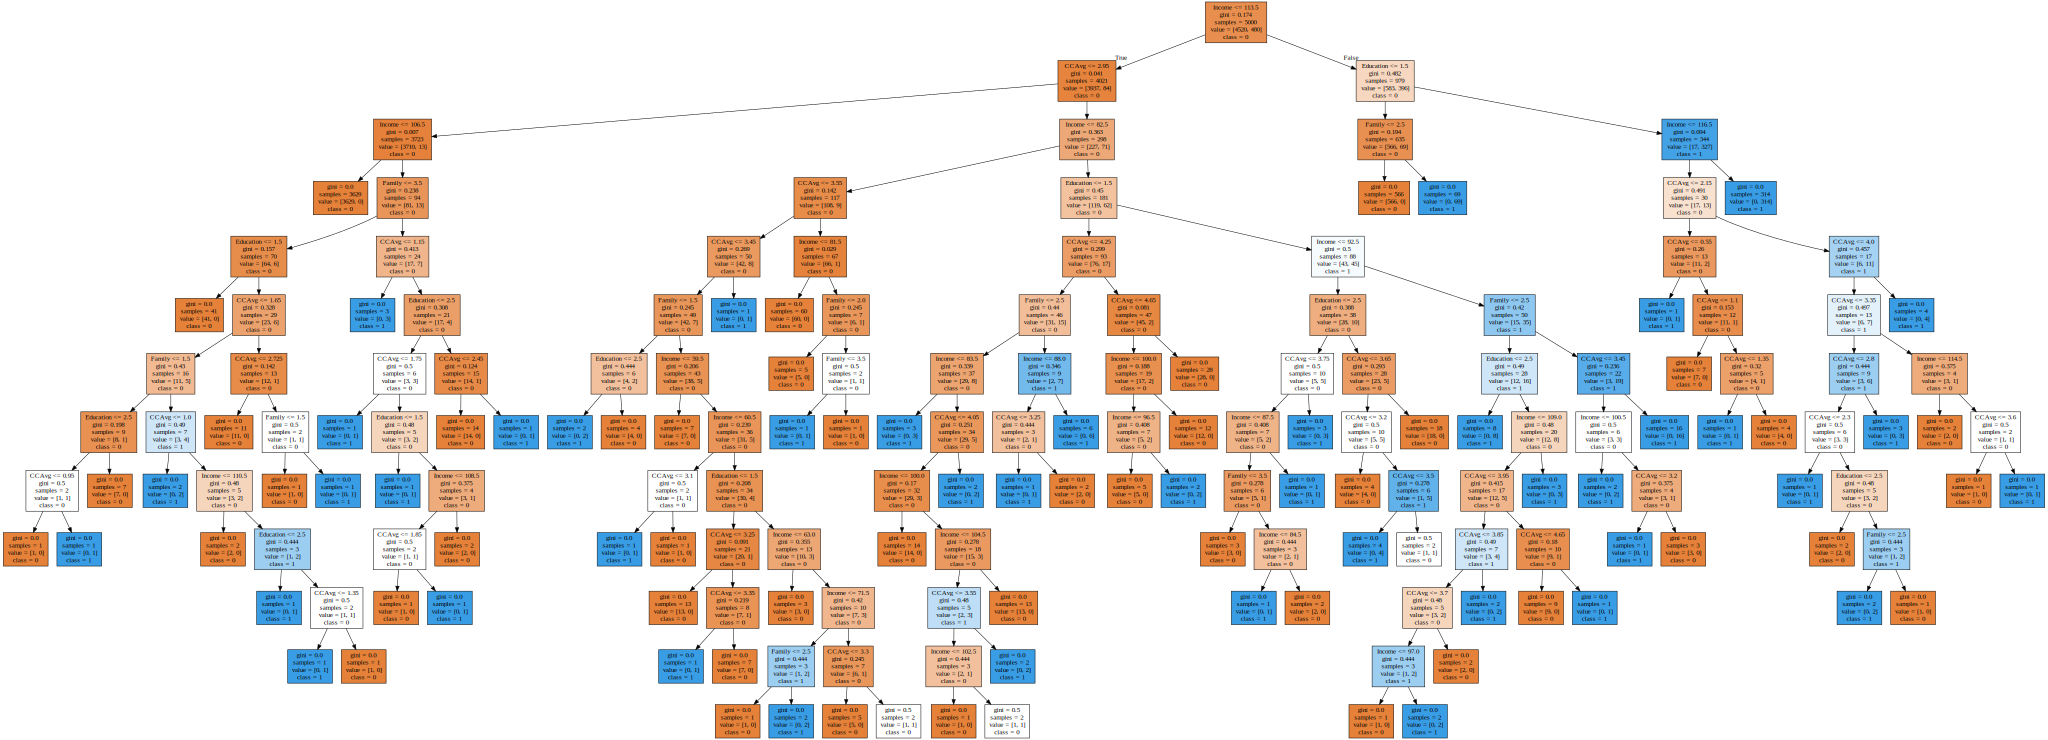

In [27]:
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=['Income','CCAvg','Education','Family'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

# Predicting Score

In [28]:
model.score(imp_col,y_log)

0.9994

# Fitting Random Forest

In [29]:
rf.fit(imp_col,y_log)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

# Accuracy Score

In [30]:
rf.oob_score_

0.9876

# Inference

Accuracy Score is almost same in case of both Decision Tree and Random Forest so, it means data is not over fitted in the case of Decision Tree.